## Descrição do Dataset

- **Nome do dataset:** Descontinuado – Fator de Qualidade — Hospitais 100%  
- **Link original:** https://dados.gov.br/dados/conjuntos-dados/descontinuado-fator-de-qualidade---hospitais-100  
- **Órgão responsável pela publicação:** ANS — Agência Nacional de Saúde Suplementar  
- **Tema e finalidade:**  
  Os critérios para aplicação do **Fator de Qualidade** seguem as diretrizes estabelecidas pelas Instruções Normativas ANS/DIDES nº 61/2015 e nº 63/2016, que complementam a regulamentação da Lei nº 13.003/2014 (alteração da Lei nº 9.656/98). O Fator de Qualidade pode ser de **105%**, **100%** ou **85%** do IPCA, conforme o cumprimento de requisitos de qualidade previstos em Nota Técnica anual.
   
   **Este dataset (recorte “Hospitais 100%”) lista os prestadores qualificados a 100% no período em que a ANS realizava essa verificação.**



  **Descontinuação:** Em 2018, a RN nº 436/2018 alterou a RN nº 364/2014, mantendo o fator de qualidade como instrumento de reajuste, porém transferindo às **operadoras** a verificação dos critérios junto aos prestadores, a qualquer tempo no ano-base. Assim, a ANS deixou de publicar as listas no Dados Abertos, e o conjunto foi descontinuado.

- **Número de registros:** 370  
- **Número de colunas:** 5

- **Variáveis importantes:**  
  - `Nome_Fantasia`: Nome do hospital/prestador.  
  - `Cnes`: Código Nacional de Estabelecimentos de Saúde (identificador do estabelecimento).  
  - `Cnpj`: Cadastro Nacional da Pessoa Jurídica (identificador da pessoa jurídica).  
  - `UF`: Unidade da Federação.  
  - `Municipio`: Município do prestador.


In [1]:
# Instalação
!pip install pandas openpyxl matplotlib seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Exploração Estatística - Hospitais 100% (ANS)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (11, 6)

CSV_NAME = "Fator_Qualidade_Hospitais.csv"

try:
    df = pd.read_csv(CSV_NAME, sep=";", encoding="latin1")
except Exception:
    try:
        df = pd.read_csv(CSV_NAME, sep=",", encoding="latin1")
    except Exception:
        df = pd.read_csv(CSV_NAME)

print("Dimensão:", df.shape)
print("Colunas:", list(df.columns))
display(df.head())

# Tipos e valores ausentes
print("\nTipos de dados (antes de ajustes):")
print(df.dtypes)

print("\nValores ausentes por coluna:")
print(df.isna().sum())

# Formatação de Dados
for col in ["Cnes", "Cnpj", "UF", "Municipio", "Nome_Fantasia"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
if "UF" in df.columns:
    df["UF"] = df["UF"].str.upper()

# Estatísticas descritivas

# Hospitais por UF.

if "UF" not in df.columns:
    raise ValueError("Coluna 'UF' não encontrada.")

hosp_por_uf = df["UF"].value_counts().sort_values(ascending=False)
hosp_por_uf_df = hosp_por_uf.rename_axis("UF").reset_index(name="Hospitais")

print("\nHospitais por UF (top 10):")
display(hosp_por_uf_df.head(10))

# Estatísticas clássicas sobre 'Hospitais por UF'
media = hosp_por_uf.mean()
mediana = hosp_por_uf.median()
moda = hosp_por_uf.mode().tolist()
minimo = hosp_por_uf.min()
maximo = hosp_por_uf.max()
desvio = hosp_por_uf.std()
variancia = hosp_por_uf.var()
q1 = hosp_por_uf.quantile(0.25)
q2 = hosp_por_uf.quantile(0.50)  # mediana
q3 = hosp_por_uf.quantile(0.75)
iqr = q3 - q1

stats = pd.DataFrame({
    "média": [media],
    "mediana": [mediana],
    "moda": [moda],
    "mín": [minimo],
    "máx": [maximo],
    "desvio_padrão": [desvio],
    "variância": [variancia],
    "Q1": [q1],
    "Q2_mediana": [q2],
    "Q3": [q3],
    "IQR": [iqr],
})
print("\nEstatísticas descritivas sobre 'Hospitais por UF':")
display(stats)

# Municípios únicos por UF
if "Municipio" in df.columns:
    mun_por_uf = df.groupby("UF")["Municipio"].nunique().sort_values(ascending=False)
    mun_por_uf_df = mun_por_uf.rename_axis("UF").reset_index(name="Municipios_unicos")
    print("\nMunicípios únicos com hospitais por UF (top 10):")
    display(mun_por_uf_df.head(10))
else:
    mun_por_uf = None

# Verificação de Integridade
dup_cnes = df["Cnes"].duplicated().sum() if "Cnes" in df.columns else np.nan
dup_cnpj = df["Cnpj"].duplicated().sum() if "Cnpj" in df.columns else np.nan
print(f"\nDuplicados em CNES: {dup_cnes} | Duplicados em CNPJ: {dup_cnpj}")

Dimensão: (370, 5)
Colunas: ['Nome_Fantasia', 'Cnes', 'Cnpj', 'UF', 'Municipio']


,Nome_Fantasia,Cnes,Cnpj,UF,Municipio
0,AMPARO MATERNIDADE,3427633,26618074000180,GO,GOIANIA
1,APMI,2568373,81644718000112,PR,UNIAO DA VITORIA
2,ASILO DE CARIDADE SANTA CASA DE BOM SUCESSO,2179628,18863985000144,MG,BOM SUCESSO
3,ASSOC AACD V CLEMENTINO,2077655,60979457000111,SP,SAO PAULO
4,ASSOCIACAO BENEFICENTE HOSPITALAR PERITIBA,2689863,78478559000119,SC,PERITIBA



Tipos de dados (antes de ajustes):
Nome_Fantasia    object
Cnes              int64
Cnpj              int64
UF               object
Municipio        object
dtype: object

Valores ausentes por coluna:
Nome_Fantasia    0
Cnes             0
Cnpj             0
UF               0
Municipio        0
dtype: int64

Hospitais por UF (top 10):


,UF,Hospitais
0,MG,66
1,SP,54
2,SC,39
3,RS,36
4,PR,35
5,RJ,33
6,GO,28
7,ES,16
8,BA,10
9,PE,7



Estatísticas descritivas sobre 'Hospitais por UF':


,média,mediana,moda,mín,máx,desvio_padrão,variância,Q1,Q2_mediana,Q3,IQR
0,14.230769,5.0,[2],1,66,18.437587,339.944615,2.0,5.0,25.0,23.0



Municípios únicos com hospitais por UF (top 10):


,UF,Municipios_unicos
0,MG,43
1,SP,35
2,RS,32
3,SC,29
4,RJ,14
5,PR,12
6,ES,8
7,GO,6
8,BA,5
9,MS,4



Duplicados em CNES: 6 | Duplicados em CNPJ: 5


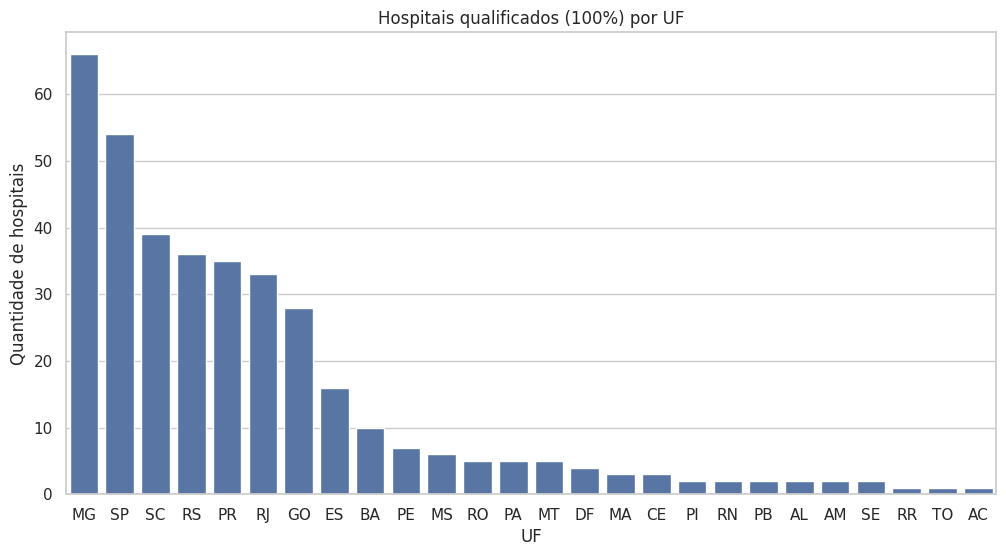

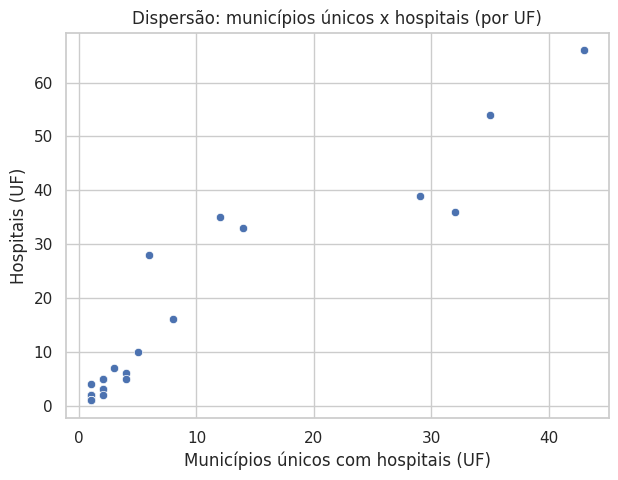

In [16]:
# Visualizações

# Hospitais por UF
plt.figure(figsize=(12, 6))
sns.barplot(x=hosp_por_uf.index, y=hosp_por_uf.values)
plt.title("Hospitais qualificados (100%) por UF")
plt.xlabel("UF")
plt.ylabel("Quantidade de hospitais")
plt.xticks(rotation=0)
plt.show()

# Dispersão: municípios únicos x hospitais por UF
if mun_por_uf is not None:
    base = pd.merge(hosp_por_uf_df, mun_por_uf_df, on="UF", how="inner")
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=base, x="Municipios_unicos", y="Hospitais")
    plt.title("Dispersão: municípios únicos x hospitais (por UF)")
    plt.xlabel("Municípios únicos com hospitais (UF)")
    plt.ylabel("Hospitais (UF)")
    plt.show()

Hospitais 100% do Fator de Qualidade por Região:


,count
Região,
Sudeste,169
Sul,110
Centro-Oeste,43
Nordeste,33
Norte,15


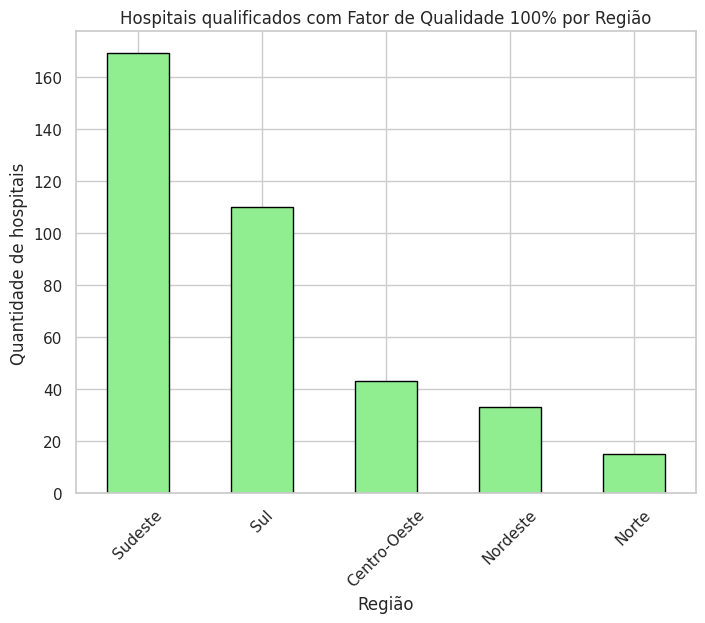

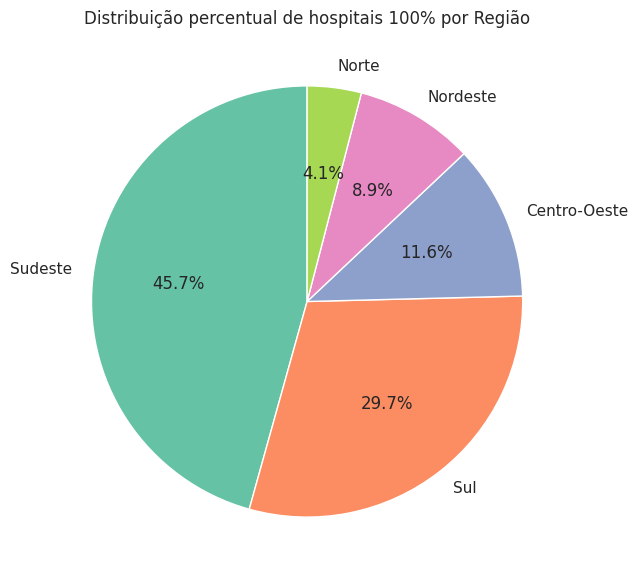

In [27]:
mapa_regioes = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

def get_regiao(uf):
    for regiao, ufs in mapa_regioes.items():
        if uf in ufs:
            return regiao
    return "Desconhecido"

df["Região"] = df["UF"].apply(get_regiao)

hosp_por_regiao = df["Região"].value_counts().sort_values(ascending=False)

print("Hospitais 100% do Fator de Qualidade por Região:")
display(hosp_por_regiao)

# Barras
plt.figure(figsize=(8,6))
hosp_por_regiao.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Hospitais qualificados com Fator de Qualidade 100% por Região")
plt.xlabel("Região")
plt.ylabel("Quantidade de hospitais")
plt.xticks(rotation=45)
plt.show()

# Pizza
plt.figure(figsize=(7,7))
hosp_por_regiao.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"])
plt.ylabel("")
plt.title("Distribuição percentual de hospitais 100% por Região")
plt.show()


In [21]:
# Resultados
top_uf = hosp_por_uf.index[0]
top_qtd = int(hosp_por_uf.iloc[0])
bot_uf = hosp_por_uf.index[-1]
bot_qtd = int(hosp_por_uf.iloc[-1])

print("\n=== Resultados ===")
print(f"- UF com MAIOR número de hospitais 100%: {top_uf} ({top_qtd}).")
print(f"- UF com MENOR número de hospitais 100%: {bot_uf} ({bot_qtd}).")
print(f"- Média de hospitais por UF: {media:.2f}; mediana: {mediana:.0f}; IQR: {iqr:.0f}.")
if dup_cnes > 0 or dup_cnpj > 0:
    print(f"- Há possíveis duplicidades — CNES: {dup_cnes}, CNPJ: {dup_cnpj}.")
else:
    print("- Não foram detectadas duplicidades em CNES/CNPJ.")
if mun_por_uf is not None:
    corr = base[["Municipios_unicos", "Hospitais"]].corr().iloc[0,1]
    print(f"- Correlação (municípios únicos x hospitais por UF): {corr:.2f} (sinal indica tendência).")


=== Resultados ===
- UF com MAIOR número de hospitais 100%: MG (66).
- UF com MENOR número de hospitais 100%: AC (1).
- Média de hospitais por UF: 14.23; mediana: 5; IQR: 23.
- Há possíveis duplicidades — CNES: 6, CNPJ: 5.
- Correlação (municípios únicos x hospitais por UF): 0.95 (sinal indica tendência).
